pth file 
https://drive.google.com/file/d/1_FqPk4HiZbO1QH9aS6CFMVXEh80u4JEI/view?usp=sharing

In [ ]:
!python -c "import monai" || pip install -q "monai-weekly[nibabel]"
!python -c "import matplotlib" || pip install -q matplotlib

Traceback (most recent call last):
  File "<string>", line 1, in <module>
ModuleNotFoundError: No module named 'monai'
     |████████████████████████████████| 714 kB 5.5 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path0 = '/content/drive/Shareddrives/Project/brats18_train' # replace your data path
path_t = '/content/drive/Shareddrives/Project/brats18_test'
dpiv = 80

In [ ]:
from monai.transforms import (
    Activations,
    Activationsd,
    AsDiscrete,
    AsDiscreted,
    Compose,
    Invertd,
    LoadImaged,
    MapTransform,
    NormalizeIntensityd,
    Orientationd,
    RandFlipd,
    RandScaleIntensityd,
    RandShiftIntensityd,
    RandSpatialCropd,
    Spacingd,
    EnsureChannelFirstd,
    EnsureTyped,
    EnsureType,
    AddChanneld,
    CenterSpatialCropd,
    RandAffined,
    RandGaussianNoised,
    RandGaussianSmoothd,
    ToTensord,
    SqueezeDimd,
    RandCropByPosNegLabeld,
    RandBiasFieldd,
    RandGaussianSharpend,
    RandRotate90d

)
from monai.config import print_config
from monai.data import DataLoader, Dataset
from monai.utils import first

from monai.losses import DiceLoss
from monai.losses import DiceCELoss
from monai.metrics import DiceMetric
from monai.networks.nets import UNet
from monai.inferers import sliding_window_inference
from monai.networks.layers import Norm

import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [ ]:
path_test = glob.glob(os.path.join(path_t,'Brats18*'))
len(path_test)

20

In [ ]:
test_ind = np.arange(0,20)
data_dicts = [
    {
        "image": os.path.join(path_test[idx],
                                    "t1ce.nii.gz"),
    }
    for idx in test_ind
]
test_files =  data_dicts

In [ ]:
test_transforms = Compose(
    [
      LoadImaged(keys=("image")),
      AddChanneld(keys=("image")),
      #SqueezeDimd(keys=["grem","up"],dim=-1),

     ######

      #ConvertToMultiChannel(keys="label"),
       
        Spacingd(
            keys=["image"],
            pixdim=(1., 1., 1.),
            mode=("bilinear"),
        ),     
     
        Orientationd(keys=["image"], axcodes="RAS"),
       # ResizeWithPadOrCropd(keys=["image","label"],spatial_size=(256,256,48)),    ############(256,256,48)
     

        NormalizeIntensityd(keys="image", nonzero=True, channel_wise=True),
        ToTensord(keys=["image"]),
     
    ]
)

In [ ]:
test_ds = Dataset(data = test_files, transform = test_transforms)
#test_loader = DataLoader(test_ds,batch_size = 1)
test_loader = DataLoader(test_ds,batch_size = 1,num_workers=2)

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
else:
  device = torch.device('cpu')

print(device)

cuda:0


In [ ]:
model = UNet(
    dimensions=3,
    in_channels=1,
    out_channels=2, #tumor & background
    channels=(16, 32, 64, 128, 256),
    #channels=(8, 16, 32, 64),
    #channels=(16, 32, 64, 128),#8,16,32,64
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm=Norm.BATCH,
).to(device)
loss_function = DiceLoss(to_onehot_y=True, softmax=True)


root_dir = '/content/drive/Shareddrives/Project/pth'
model.load_state_dict(torch.load(
    os.path.join(root_dir, "best_metric_model_epoch_box_L77_3.pth")))
#저장한 모델을 불러오는 과정, 모델을 정의하는 과정은 있어야됨(model = UNet( ),todevice -이거)

<All keys matched successfully>

In [ ]:
model.eval()

UNet(
  (model): Sequential(
    (0): ResidualUnit(
      (conv): Sequential(
        (unit0): Convolution(
          (conv): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
        (unit1): Convolution(
          (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
      )
      (residual): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
    )
    (1): SkipConnection(
      (submodule): Sequential(
        (0): ResidualUnit(
          (conv): Sequential(


['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_02/t1ce.nii.gz']


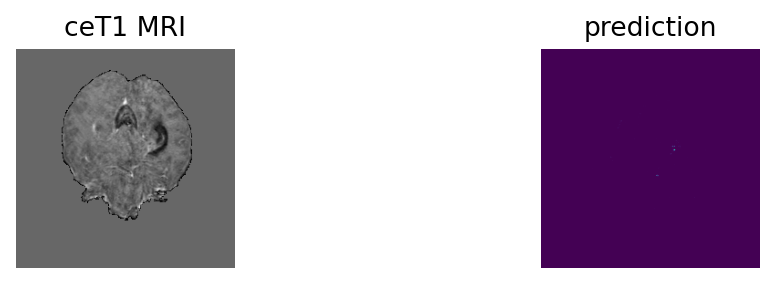

['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_04/t1ce.nii.gz']


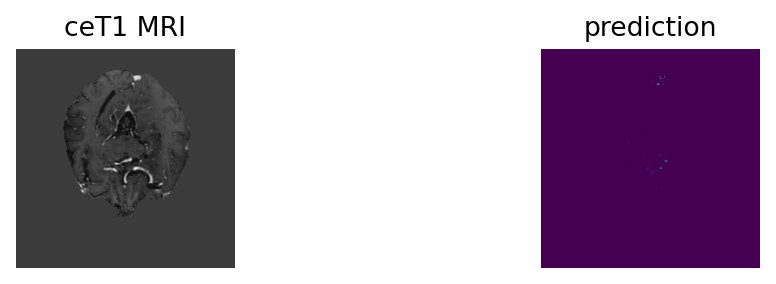

['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_05/t1ce.nii.gz']


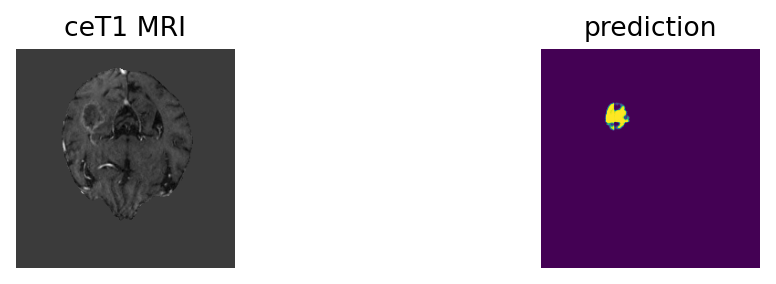

['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_10/t1ce.nii.gz']


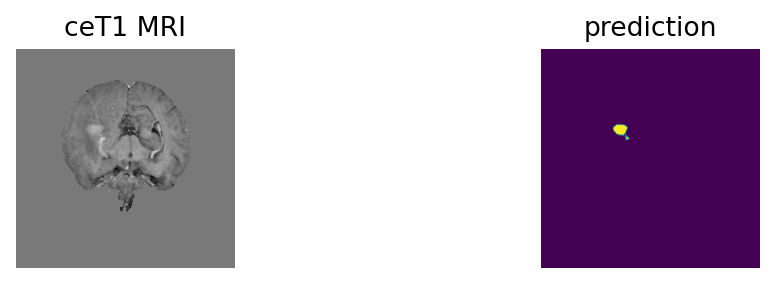

['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_09/t1ce.nii.gz']


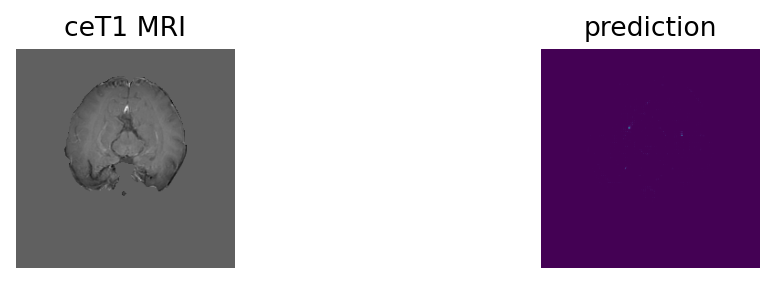

['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_07/t1ce.nii.gz']


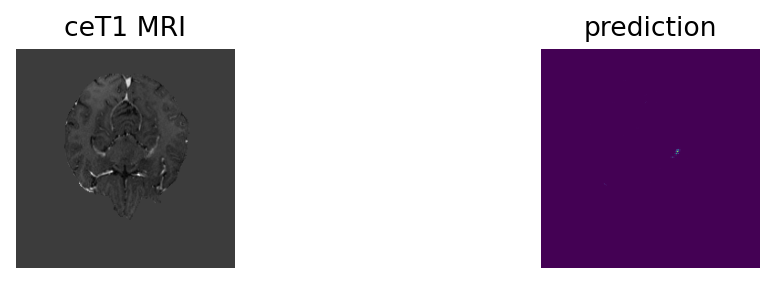

['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_06/t1ce.nii.gz']


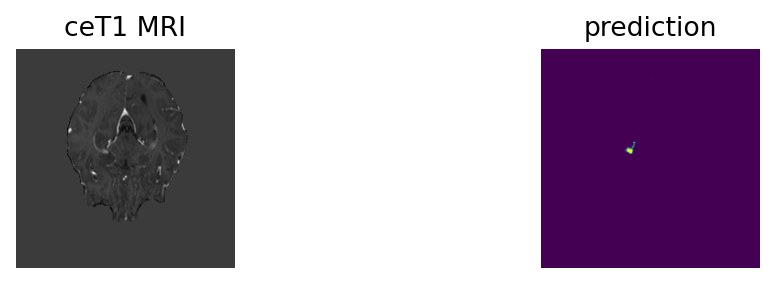

['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_01/t1ce.nii.gz']


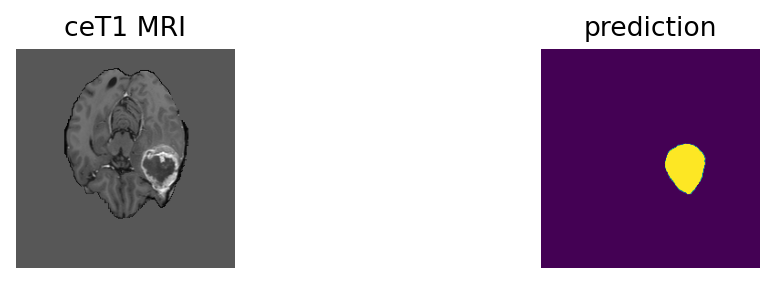

['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_03/t1ce.nii.gz']


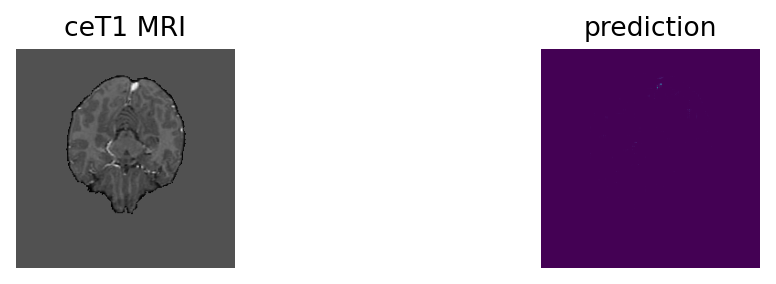

['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_08/t1ce.nii.gz']


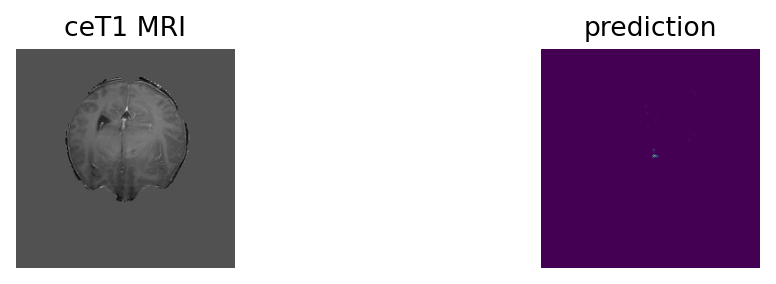

['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_13/t1ce.nii.gz']


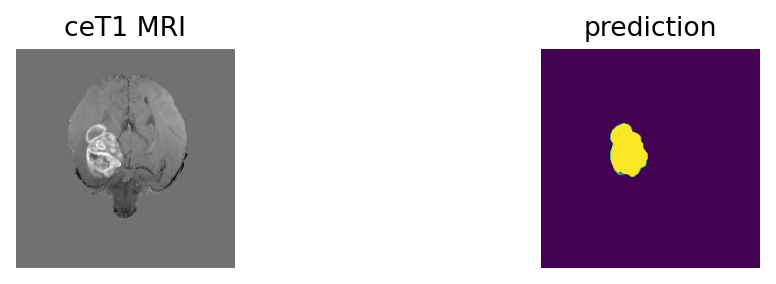

['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_14/t1ce.nii.gz']


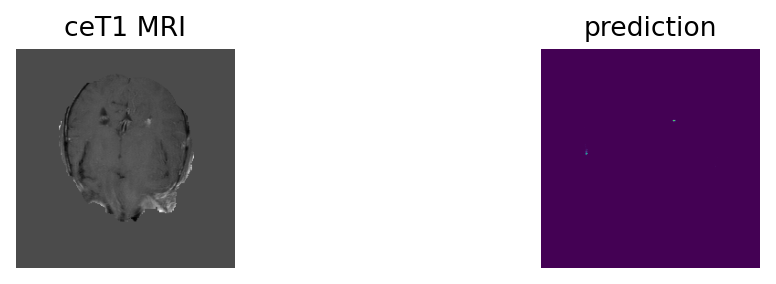

['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_19/t1ce.nii.gz']


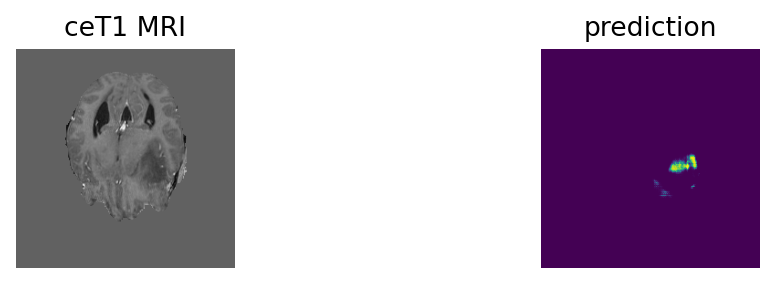

['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_20/t1ce.nii.gz']


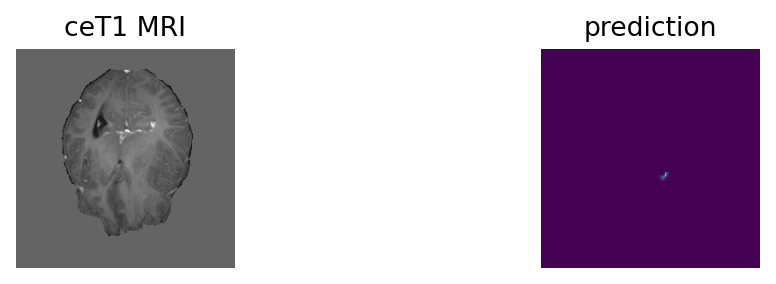

['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_17/t1ce.nii.gz']


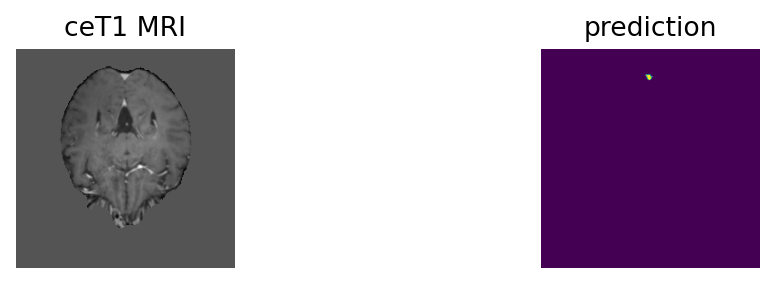

['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_18/t1ce.nii.gz']


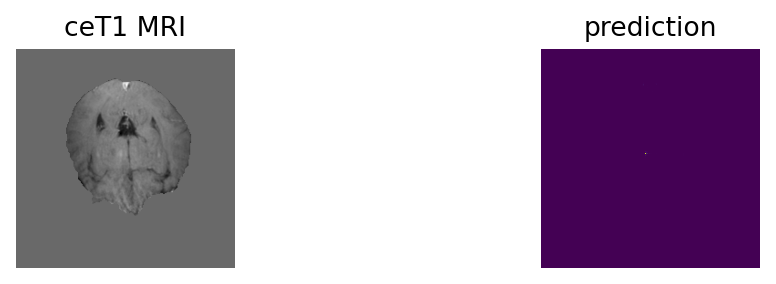

['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_15/t1ce.nii.gz']


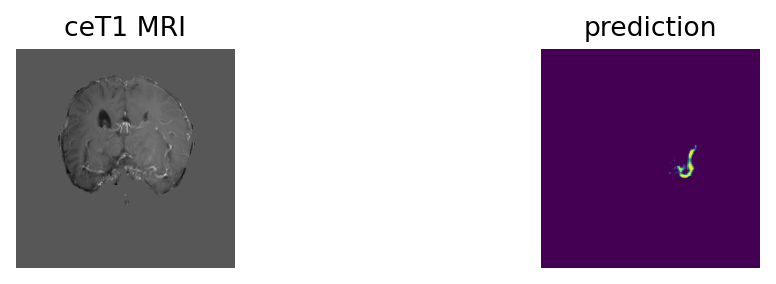

['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_16/t1ce.nii.gz']


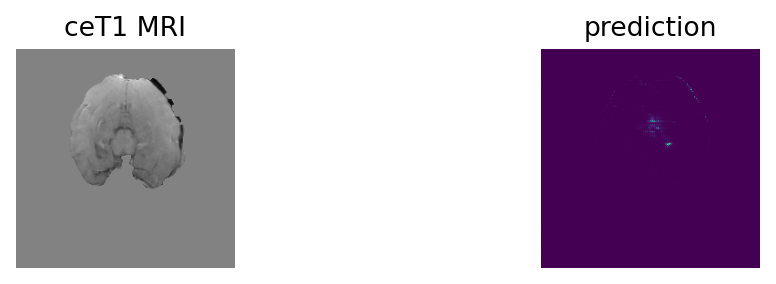

['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_11/t1ce.nii.gz']


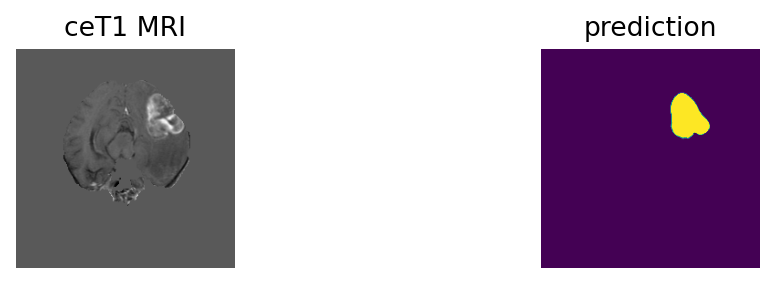

['/content/drive/Shareddrives/Project/brats18_test/Brats18_test_12/t1ce.nii.gz']


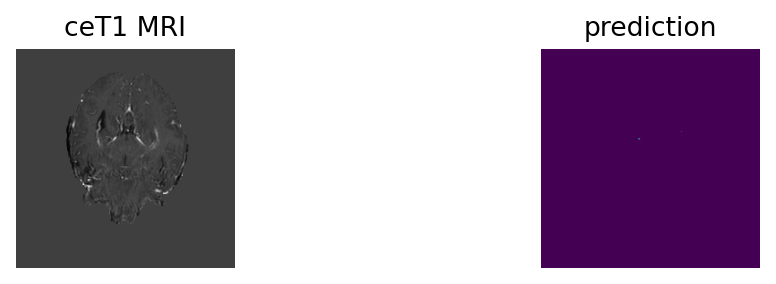

In [ ]:
#pathh = "/content/drive/Shareddrives/Project/valid_out"
import nibabel as nib
import numpy as np


pathh = "/content/drive/Shareddrives/Project/test_out"

path_out = os.path.join(pathh,'L7_150_3rd_submit') # the results will be saved in this folder
if os.path.isdir(path_out)==0:
  os.mkdir(path_out)

flag_save = 1
for test_data in test_loader:
  with torch.no_grad():
    test_inputs = test_data["image"].to(device)

    #val_labels = (val_labels==1).type(torch.FloatTensor) + (val_labels==4).type(torch.FloatTensor)
    #val_labels[val_labels>0] = 1
    #val_labels = val_labels.to(device)
    roi_size = (160, 160, 64)
    sw_batch_size = 4
    test_outputs = sliding_window_inference(
    test_inputs, roi_size, sw_batch_size, model, overlap=0.75)
    #test_loss = loss_function(test_outputs)
    
    print(test_data['image_meta_dict']['filename_or_obj'])
    zz=58
    #zz = np.argmax(np.sum(np.sum(np.array(val_labels[0,0,:,:,:].cpu()),axis=1),axis=0))
    test_preds = test_outputs.softmax(1)
    plt.figure(dpi=dpiv*2)
    plt.subplot(131)
    plt.imshow(np.transpose(test_inputs[0,0,:,:,zz].cpu().numpy(),(1,0)),cmap='gray')
    plt.axis('off')
    plt.title('ceT1 MRI')
    #plt.subplot(132)
    #plt.imshow(np.transpose(_labels[0,0,:,:,zz].cpu().numpy(),(1,0)))
    #plt.axis('off')
    #plt.title('ground truth')
    plt.subplot(133)
    plt.imshow(np.transpose(test_preds[0,1,:,:,zz].cpu().numpy(),(1,0)))
    plt.axis('off')
    plt.title('prediction')
    plt.show()

    if flag_save == 1:
      test_seg = torch.argmax(test_preds.cpu(),dim=1).numpy()
      pid = test_data['image_meta_dict']['filename_or_obj'][0].split('/')[-2]
      h = nib.load(test_data['image_meta_dict']['filename_or_obj'][0])
      h_new=nib.Nifti1Image(test_seg[0],h.affine,h.header)
      nib.save(h_new,os.path.join(path_out,pid+'.nii.gz')) #nifti 파일을 만드는 과정'''

In [ ]:
import nibabel as nib
import numpy as np
ppath = '/content/drive/Shareddrives/Project/test_out/L7_150_3rd_submit'
filename = os.listdir(ppath)
print(len(filename))

for niifn in filename:
  proxy = nib.load(os.path.join('/content/drive/Shareddrives/Project/test_out/L7_150_3rd_submit/'+niifn))
  data = proxy.get_fdata()
  array = data.view(type=np.ndarray)
  # np.flip(array,0) -> 좌우대칭 RL
  # np.flip(array,1) -> 앞뒤대칭 AP 
  # np.flip(array,2) -> 상하대칭 IS
  array_flip = np.flip(array,0)
  array_flip = np.flip(array_flip,1)
  #array_flip = np.flip(array_flip,2)

  aff = proxy.affine
  hdr = proxy.header


  zflip = nib.Nifti1Image(array_flip,aff, hdr)
  path_tr = '/content/drive/Shareddrives/Project/test_out/'
  path_treverse = os.path.join(path_tr,'L7_reverse_150_3rd_submit') # the results will be saved in this folder
  if os.path.isdir(path_treverse)==0:
    os.mkdir(path_treverse)
  #nib.save(zflip, os.path.join('/content/drive/Shareddrives/Project/valid_out/L7_reverse_150/'+niifn[:-7]+'.nii.gz'))
  nib.save(zflip, os.path.join('/content/drive/Shareddrives/Project/test_out/L7_reverse_150_3rd_submit/'+niifn[:-7]+'.nii.gz'))


20
